In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
%matplotlib inline

## LOAD RESOURCES ##

In [17]:
path = 'resources/extended_dataset.parquet'
df = pd.read_parquet(path)
df.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,...,Re-inspection,Community,Neighborhood,Ward,Precinct,Violation IDs,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
0,2320519,SALAM RESTAURANT,SALAM RESTAURANT,2002822,Restaurant,High,4634-4636 N KEDZIE AVE,60625,2019-10-25,Complaint,...,True,ALBANY PARK,"NORTH PARK,ALBANY PARK",33,27,[None],0,0,0,0
1,2320509,TAQUERIA EL DORADO,TAQUERIA EL DORADO,2694960,Restaurant,High,2114 W LAWRENCE AVE,60625,2019-10-25,License,...,True,LINCOLN SQUARE,LINCOLN SQUARE,47,38,"[3, 5, 25, 50, 53, 53, 56, 58]",8,2,1,5


In [18]:
community_areas = pd.read_csv('resources/community_areas_infos.csv', delimiter=',').set_index('Community')
community_areas.index = community_areas.index.str.upper()
community_areas.head()

,Community Area Number,Percent of housing crowded,Percent households below poverty,Percent aged 16+ unemployed,Percent aged 25+ without high school diploma,Percent aged under 18 or over 64,Per capita income,Hardship index
Community,,,,,,,,
ROGERS PARK,1.0,7.7,23.6,8.7,18.2,27.5,23939,39.0
WEST RIDGE,2.0,7.8,17.2,8.8,20.8,38.5,23040,46.0
UPTOWN,3.0,3.8,24.0,8.9,11.8,22.2,35787,20.0
LINCOLN SQUARE,4.0,3.4,10.9,8.2,13.4,25.5,37524,17.0
NORTH CENTER,5.0,0.3,7.5,5.2,4.5,26.2,57123,6.0


## SOME CLEANING ##

In [19]:
count_by_community = df[['Community', 'Inspection ID']].groupby('Community').count().rename(columns={'Inspection ID' : 'Count'}).sort_values('Count')
count_by_community.head(10)

,Count
Community,
BURNSIDE,20
OAKLAND,48
RIVERDALE,183
PULLMAN,294
FULLER PARK,358
HEGEWISCH,447
OHARE,500
AVALON PARK,560
MONTCLARE,611


In [20]:
df_filtered = df[(df['Community'] != 'BURNSIDE') & (df['Community'] != 'OAKLAND')]

## CAN WE FIND CORRELATIONS BETWEEN THE NUMBER OF VIOLATIONS BY COMMUNITY AND THEIR LIFE LEVEL ? ##

In [21]:
mean_nb_violations_by_community = df_filtered[['Community', 'Nb Violations', 'Nb Violations of high severity', 'Nb Violations of medium severity', 'Nb Violations of low severity']].groupby('Community').mean()
mean_nb_violations_by_community.head()

,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
Community,,,,
ALBANY PARK,3.516401,0.325109,0.294049,2.897242
ARCHER HEIGHTS,3.185700,0.346574,0.324727,2.514399
ARMOUR SQUARE,3.578030,0.380303,0.308712,2.889015
ASHBURN,2.854296,0.250311,0.220423,2.383562
AUBURN GRESHAM,3.190850,0.271895,0.299782,2.619172


In [22]:
df_joined_nb_violations = mean_nb_violations_by_community.join(community_areas)
df_joined_nb_violations.head()

,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity,Community Area Number,Percent of housing crowded,Percent households below poverty,Percent aged 16+ unemployed,Percent aged 25+ without high school diploma,Percent aged under 18 or over 64,Per capita income,Hardship index
Community,,,,,,,,,,,,
ALBANY PARK,3.516401,0.325109,0.294049,2.897242,14.0,11.3,19.2,10.0,32.9,32.0,21323.0,53.0
ARCHER HEIGHTS,3.185700,0.346574,0.324727,2.514399,57.0,8.5,14.1,16.5,35.9,39.2,16134.0,67.0
ARMOUR SQUARE,3.578030,0.380303,0.308712,2.889015,34.0,5.7,40.1,16.7,34.5,38.3,16148.0,82.0
ASHBURN,2.854296,0.250311,0.220423,2.383562,70.0,4.0,10.4,11.7,17.7,36.9,23482.0,37.0
AUBURN GRESHAM,3.190850,0.271895,0.299782,2.619172,71.0,4.0,27.6,28.3,18.5,41.9,15528.0,74.0


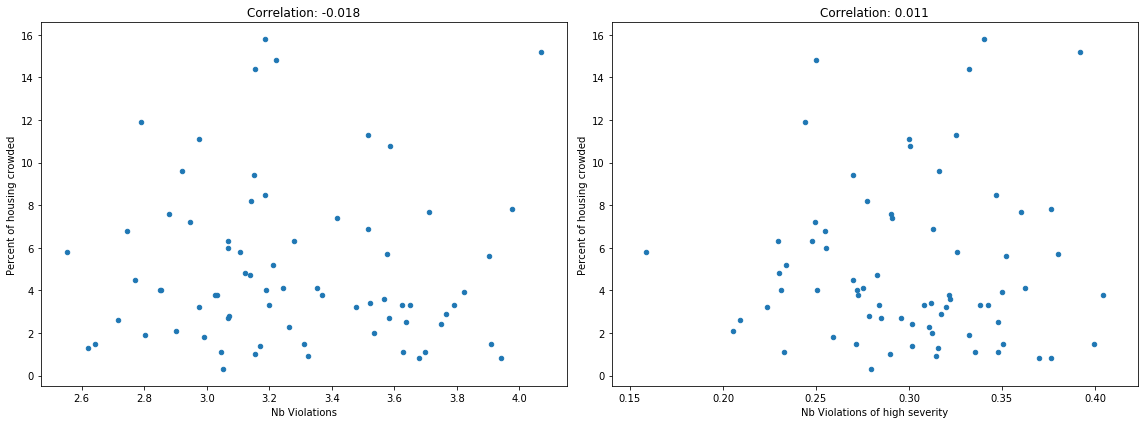

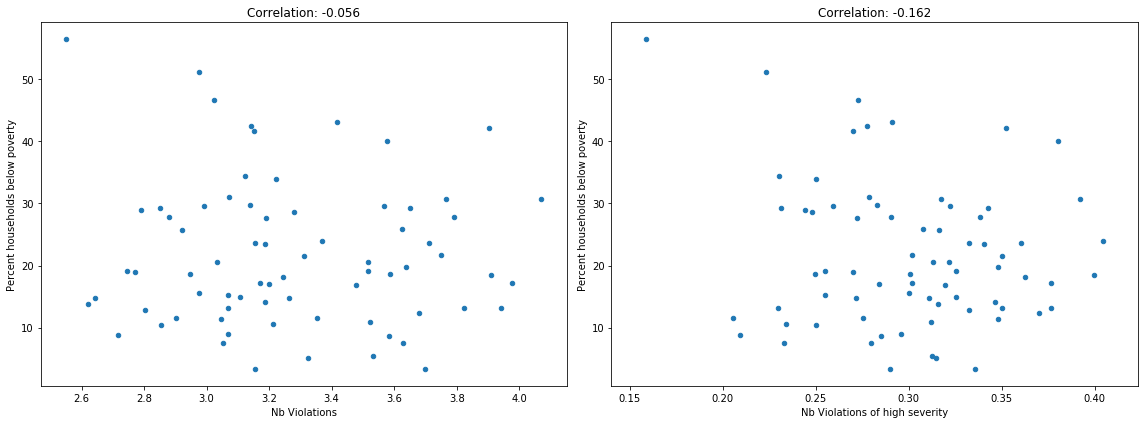

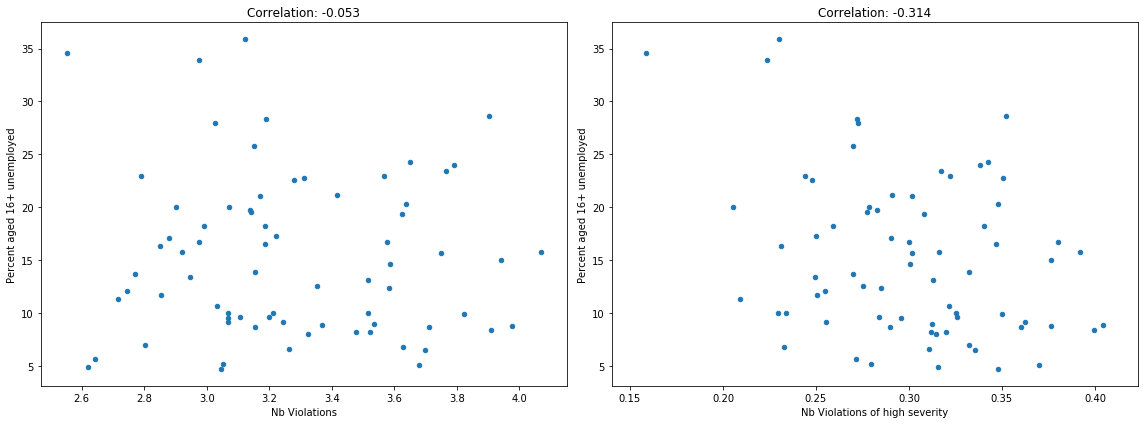

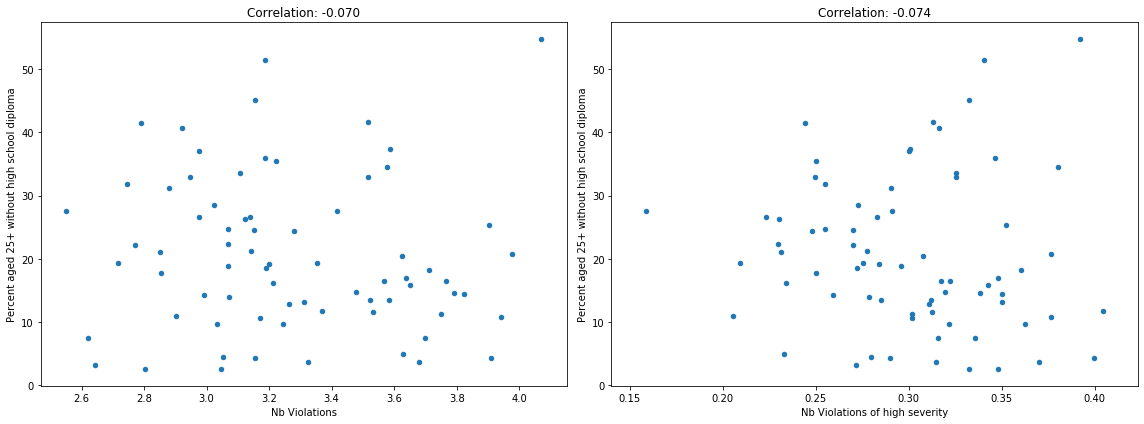

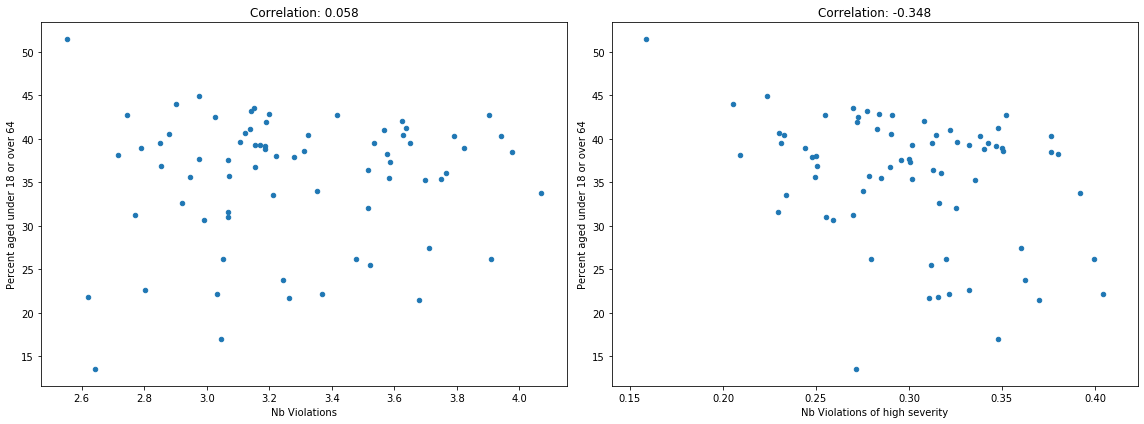

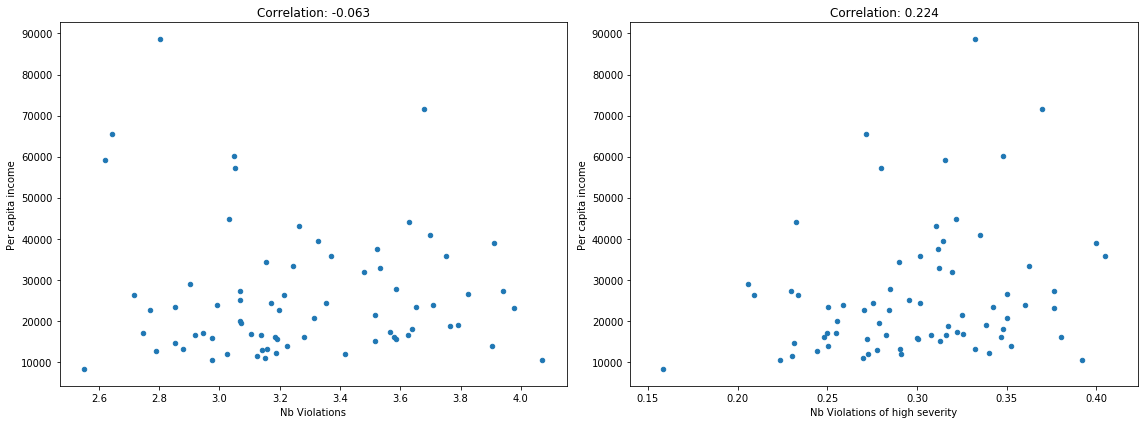

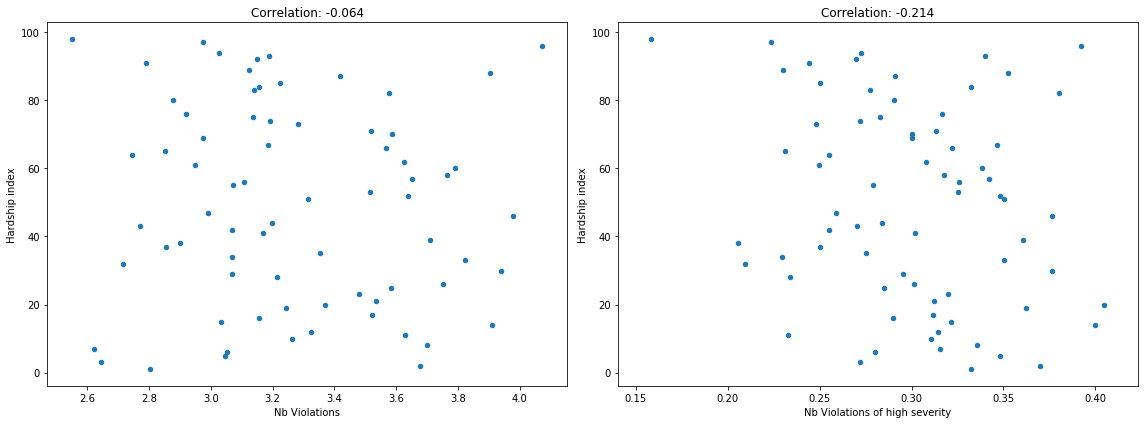

In [23]:
for column_name1 in community_areas.columns[1:]:
    fig, ax = plt.subplots(1, len(mean_nb_violations_by_community.columns[:2]), figsize=(16,6))
    
    for i, column_name2 in enumerate(mean_nb_violations_by_community.columns[:2]):
        df_joined_nb_violations[[column_name2, column_name1]].plot.scatter(x=column_name2, y=column_name1, ax=ax[i])
        ax[i].set_title('Correlation: {}'.format("%.3f" % df_joined_nb_violations[column_name2].corr(df_joined_nb_violations[column_name1])))
    
    plt.tight_layout()
    plt.show()

Sadly we have absolutly no correlation between the number of violations and the 'life levels' of the areas.

## CAN WE FIND CORRELATIONS BETWEEN THE NUMBER OF PASS/FAILS BY COMMUNITY AND THEIR LIFE LEVEL ? ##

In [24]:
results_by_community = df_filtered[['Community', 'Results']]
results_by_community['Pass'] = results_by_community['Results'].apply(lambda x: 1 if x == 'Pass' else 0)
results_by_community['Pass w/ Conditions'] = results_by_community['Results'].apply(lambda x: 1 if x == 'Pass w/ Conditions' else 0)
results_by_community['Fail'] = results_by_community['Results'].apply(lambda x: 1 if x == 'Fail' else 0)
results_by_community = results_by_community.groupby('Community').mean()
results_by_community.head()

/home/globox/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/globox/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/globox/Anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Pass,Pass w/ Conditions,Fail
Community,,,
ALBANY PARK,0.496372,0.122496,0.194775
ARCHER HEIGHTS,0.541212,0.148957,0.192651
ARMOUR SQUARE,0.552273,0.121591,0.242803
ASHBURN,0.616438,0.118929,0.141345
AUBURN GRESHAM,0.520697,0.098911,0.234858


In [25]:
df_joined_results = results_by_community.join(community_areas)
df_joined_results.head()

,Pass,Pass w/ Conditions,Fail,Community Area Number,Percent of housing crowded,Percent households below poverty,Percent aged 16+ unemployed,Percent aged 25+ without high school diploma,Percent aged under 18 or over 64,Per capita income,Hardship index
Community,,,,,,,,,,,
ALBANY PARK,0.496372,0.122496,0.194775,14.0,11.3,19.2,10.0,32.9,32.0,21323.0,53.0
ARCHER HEIGHTS,0.541212,0.148957,0.192651,57.0,8.5,14.1,16.5,35.9,39.2,16134.0,67.0
ARMOUR SQUARE,0.552273,0.121591,0.242803,34.0,5.7,40.1,16.7,34.5,38.3,16148.0,82.0
ASHBURN,0.616438,0.118929,0.141345,70.0,4.0,10.4,11.7,17.7,36.9,23482.0,37.0
AUBURN GRESHAM,0.520697,0.098911,0.234858,71.0,4.0,27.6,28.3,18.5,41.9,15528.0,74.0


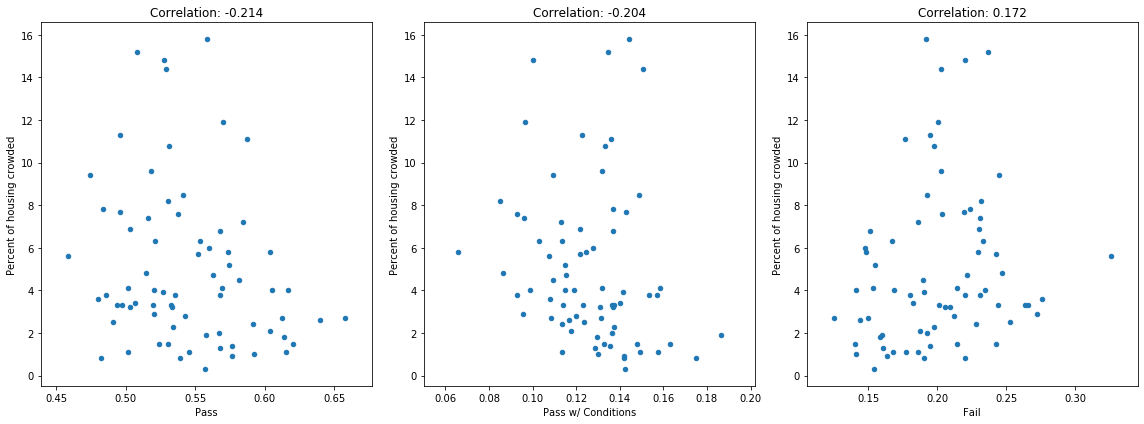

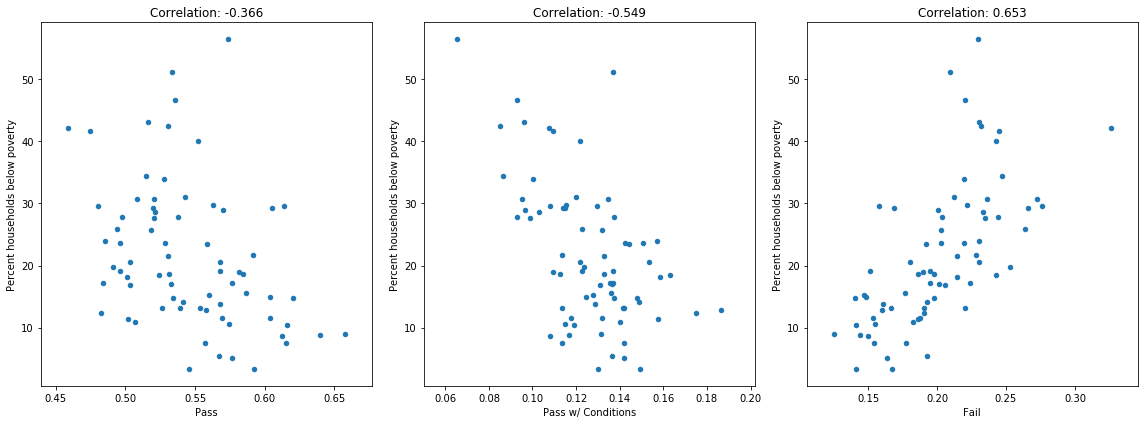

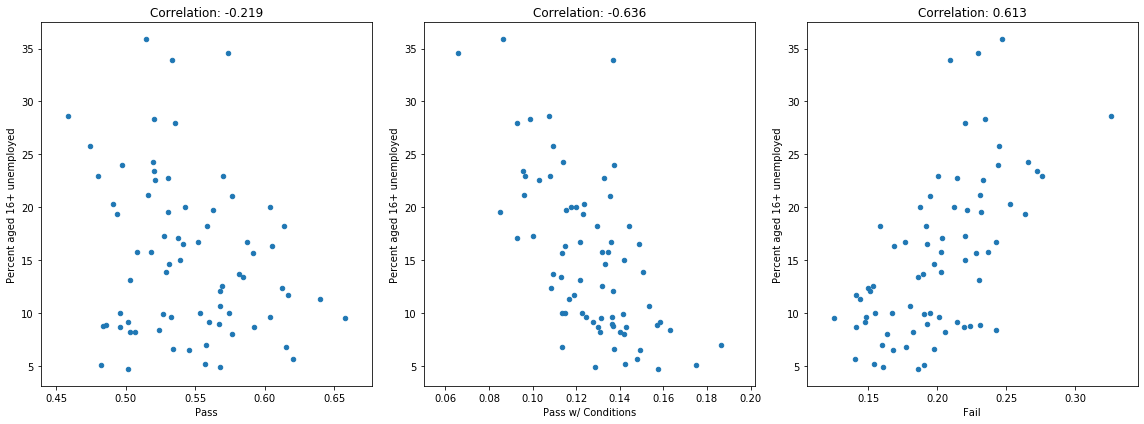

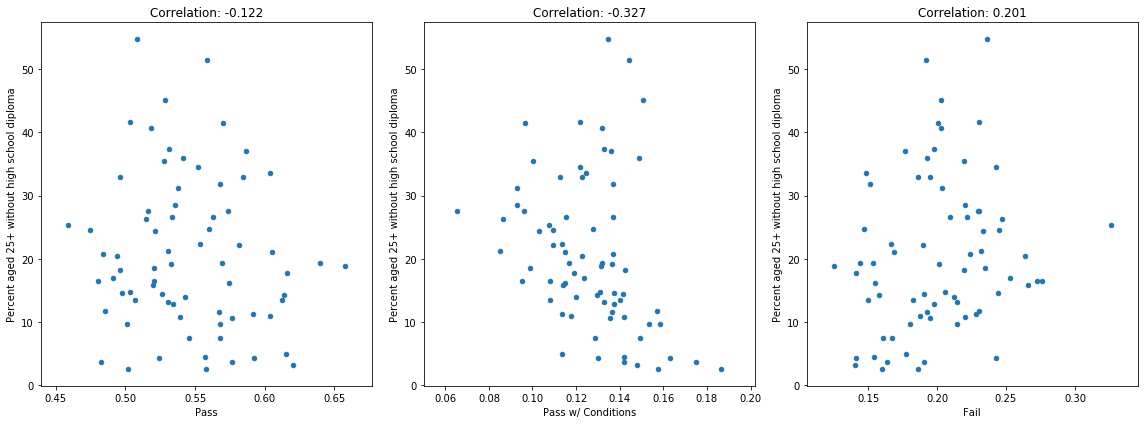

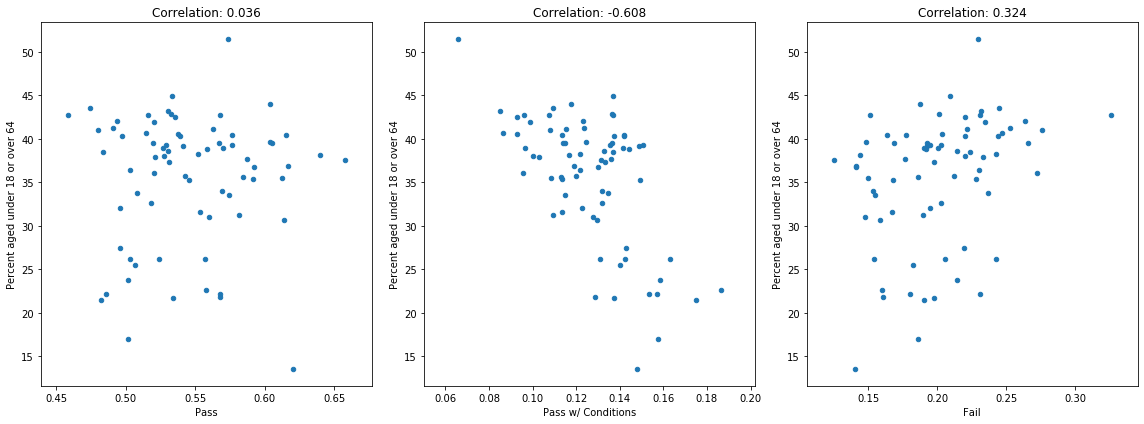

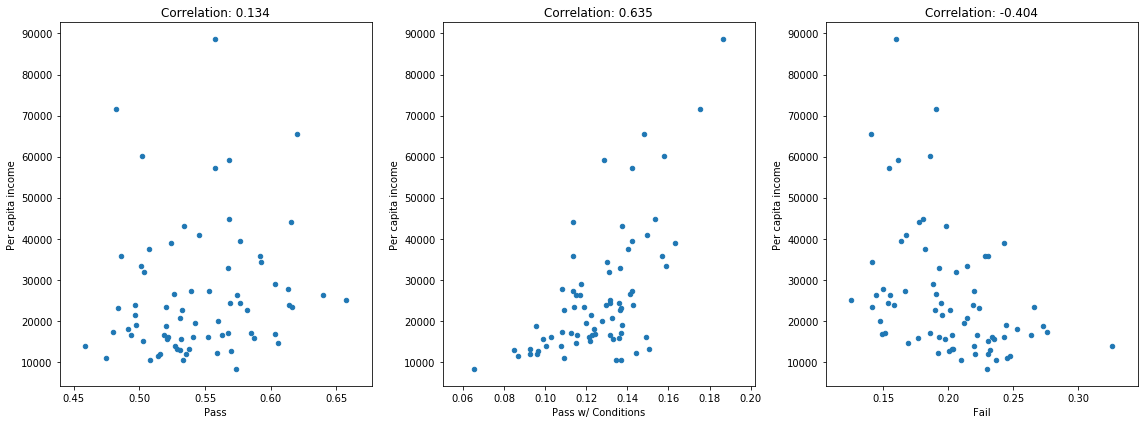

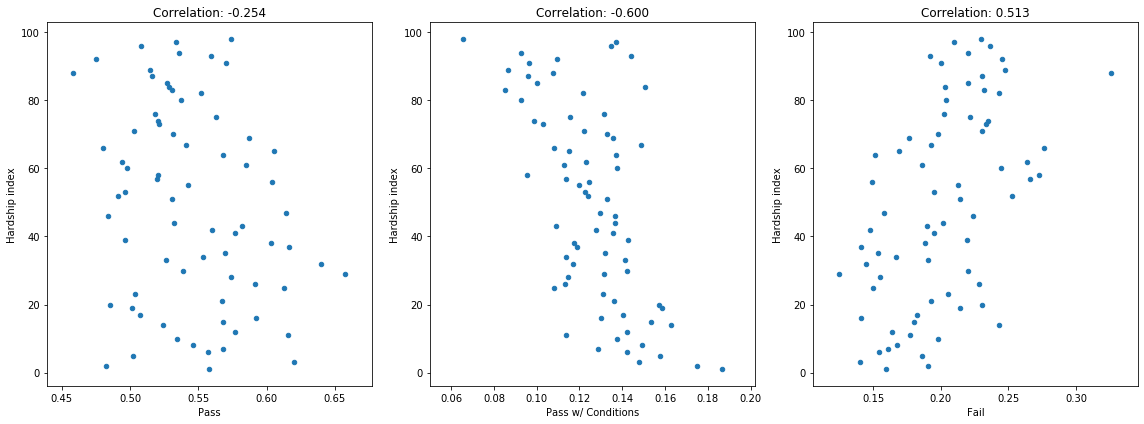

In [26]:
for column_name1 in community_areas.columns[1:]:
    fig, ax = plt.subplots(1, len(results_by_community.columns), figsize=(16,6))
    for i, column_name2 in enumerate(results_by_community.columns):
        df_joined_results[[column_name2, column_name1]].plot.scatter(x=column_name2, y=column_name1, ax=ax[i])
        ax[i].set_title('Correlation: {}'.format("%.3f" % df_joined_results[column_name2].corr(df_joined_results[column_name1])))

    plt.tight_layout()
    plt.show()

We have some slights correlations (~0.65)